In [1]:
%matplotlib inline

In [2]:
import os
import matplotlib.pyplot as plt 
import pandas as pd 
import statistics
import numpy as np 
import scipy.stats as sts 


In [3]:
city_file_load = os.path.join('Resources', 'city_data.csv')
ride_file_load = os.path.join('Resources','ride_data.csv')

city_data_df = pd.read_csv(city_file_load)
ride_data_df = pd.read_csv(ride_file_load)
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [4]:
# Merge two raw datasets into one 
pyber_data_df = pd.merge(ride_data_df,city_data_df,how = 'left',on=['city','city'])

pyber_data_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


# Analysis of Summary Table
## Summary Table Description:
 The PyBer_summary_df showcases 5 columns that includes: *Total Rides,Total Drivers,Total Fares,Average Fare per Ride and Average Fare per Driver*.
 For the first 3 columns, Urban cities have highest total numbers of rides, drivers as well as fares. Rural cities have the lowest total numbers. Suburban is in the middle.
## Summary Table Conclusion:
 However, comparing the average fare per rides between each city type, rural cities have highest average fare per ride than suburban and urban by
 around four dollars and 10 dollars, respectively.
 For the column of average fare per driver, rural cities also perform well than suburban and urban cities by 40% and 230%.
 The reason is that the rides and drivers count of rural cities, significantly lower than urban and suburban cities.
 It leads to average values greater than urban and suburban.

In [5]:
# Create a summary DataFrame
summary_ride_numbers_ds = pyber_data_df.groupby(pyber_data_df['type']).ride_id.count()
summary_drivers_numbers_ds = city_data_df.groupby(city_data_df['type']).sum()['driver_count']
summary_fares_numbers_ds = pyber_data_df.groupby(pyber_data_df['type']).fare.sum()
summary_avg_Fare_per_ride = summary_fares_numbers_ds/summary_ride_numbers_ds
summary_avg_Fare_per_driver =summary_fares_numbers_ds/summary_drivers_numbers_ds

PyBer_summary_df = pd.DataFrame({'Total Rides':summary_ride_numbers_ds.map('{:,.0f}'.format),
            'Total Drivers':summary_drivers_numbers_ds.map('{:,.0f}'.format),
            'Total Fares':summary_fares_numbers_ds.map('${:,.2f}'.format),
            'Average Fare per Ride':summary_avg_Fare_per_ride.map('${:,.2f}'.format),
            'Average Fare per Driver':summary_avg_Fare_per_driver.map('${:,.2f}'.format)})
PyBer_summary_df.index.name = None
PyBer_summary_df



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [6]:
# Rename columns
newname_pyber_data_df = pyber_data_df.rename(columns = {'city': 'City', 'date':'Date',
                    'fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 
                    'type':'City Type'} )
# Set the index to the Date column, make a copy and drop extra columns
DateAsIndex_newname_pyber_data_df = newname_pyber_data_df.set_index('Date')

fare_pyber_data_df = DateAsIndex_newname_pyber_data_df.copy().drop(columns = ['Ride Id','City','No. Drivers'])

#Set the index to the datetime data type
fare_pyber_data_df_new_index = fare_pyber_data_df.index.astype('datetime64[ns]')
fare_pyber_data_df.index = pd.Index(fare_pyber_data_df_new_index)

fare_pyber_data_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
Fare         2375 non-null float64
City Type    2375 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [7]:
# Calculate the total fares by the type of city and date to create a new DataFrame
sum_fare_pyber_data_df = fare_pyber_data_df.groupby(by = ['Date','City Type']).sum()

# Reset the index
reset_sum_fare_pyber_data_df = sum_fare_pyber_data_df.reset_index()
reset_sum_fare_pyber_data_df


,Date,City Type,Fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [8]:
# Create a pivot table and get information of total fares by city type
TotalFare_pivot_df = pd.pivot_table(reset_sum_fare_pyber_data_df, index = 'Date', 
                     values = 'Fare',columns='City Type', aggfunc=np.sum)
TotalFare_pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [9]:
# Create a new DataFrame on a given date
April_TotalFare_pivot_df = TotalFare_pivot_df.loc['2019-01-01':'2019-04-28']

# Create a new DataFrame by resample fuction in weekly bins
weekly_April_TotalFare_pivot_df = April_TotalFare_pivot_df.resample('W-MON').sum()
weekly_April_TotalFare_pivot_df



City Type,Rural,Suburban,Urban
Date,,,
2019-01-07,187.92,876.61,1879.70
2019-01-14,139.80,1080.40,2193.36
2019-01-21,233.85,1163.93,2105.90
2019-01-28,210.94,1285.13,1846.98
2019-02-04,361.50,1079.58,2085.77
2019-02-11,81.91,879.92,2200.85
2019-02-18,140.52,1394.86,2389.68
2019-02-25,448.07,1067.99,2156.88
2019-03-04,75.65,836.61,2619.82


# Analysis of Multiple-Line Plot
## Multiple-Line Plot Description:
 This multiple-line charts showcases the total fare per city type changes by times.
 The X axis shows date from 1/1/2019 to 4/28/2019, and total fare in Y axis.
 In that line chart, Urban cities have highest total fares all the time, and Rural cities are
 lowest all over time. Suburban's line is in the middle.
## Multiple-Line Plot conclusion:
 Furthermore, the urban's line shows there are several peaks in March and April. At the same time,
 the line of rural shows some correlation to Urban's line.
 For example, in the first week of March, urban's total fares are over 2,500 dollars,
 in parallel to that, Rural's line reaches the lowest point, less than 360 dollars.

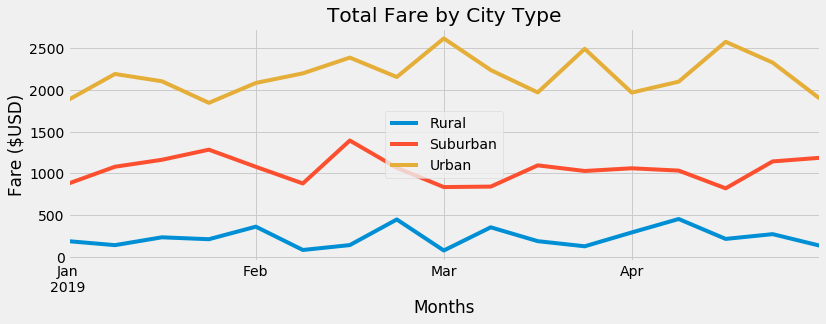

In [10]:
# Create a Multiple-Line Plot for Total Fares for Each City Type based on weekly period
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,4))
weekly_April_TotalFare_pivot_df.plot(ax = ax)

ax.set_title('Total Fare by City Type')
ax.set_xlabel('Months')
ax.set_ylabel('Fare ($USD)')

ax.legend(loc='center')
plt.savefig('analysis/Challenge_Fig.png')
plt.show()
